# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [71]:
df = pd.read_csv("../medical_cost_prediction_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   smoker                   5000 non-null   object 
 4   diabetes                 5000 non-null   int64  
 5   hypertension             5000 non-null   int64  
 6   heart_disease            5000 non-null   int64  
 7   asthma                   5000 non-null   int64  
 8   physical_activity_level  5000 non-null   object 
 9   daily_steps              5000 non-null   int64  
 10  sleep_hours              5000 non-null   float64
 11  stress_level             5000 non-null   int64  
 12  doctor_visits_per_year   5000 non-null   int64  
 13  hospital_admissions      5000 non-null   int64  
 14  medication_count        

In [72]:
df.head()

,age,gender,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_type,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost
0,69,Male,29.4,No,1,0,0,0,Medium,14825,4.4,8,1,0,4,Private,80,Semi-Urban,10885,2645.50
1,32,Female,22.9,No,1,0,0,0,Medium,3620,6.0,7,4,3,0,Government,64,Semi-Urban,18722,10959.70
2,89,Male,25.7,No,0,0,0,0,High,10578,4.5,7,2,0,3,NaN,0,Urban,4196,8409.80
3,78,Male,31.9,Yes,0,1,0,0,Low,6226,8.6,9,6,1,7,Government,70,Urban,11128,7996.62
4,38,Male,27.7,No,0,0,0,0,High,6253,5.7,3,6,0,6,Private,77,Urban,15110,3202.52


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Kolom Biner / Boolean

In [73]:
binary_cols = [
    col for col in df.columns
    if set(df[col].dropna().unique()).issubset({0, 1})
]
display(binary_cols)

['diabetes', 'hypertension', 'heart_disease', 'asthma']

## Kolom Numerik

In [74]:
init_numeric_cols =  df.select_dtypes(include=['number']).columns
numeric_cols = init_numeric_cols.difference(binary_cols)
display(numeric_cols)

Index(['age', 'annual_medical_cost', 'bmi', 'daily_steps',
       'doctor_visits_per_year', 'hospital_admissions',
       'insurance_coverage_pct', 'medication_count', 'previous_year_cost',
       'sleep_hours', 'stress_level'],
      dtype='object')

## Kolom Kategorik

In [75]:
category_cols =  df.select_dtypes(include=['object']).columns
display(category_cols)

Index(['gender', 'smoker', 'physical_activity_level', 'insurance_type',
       'city_type'],
      dtype='object')

## A. Heatmap

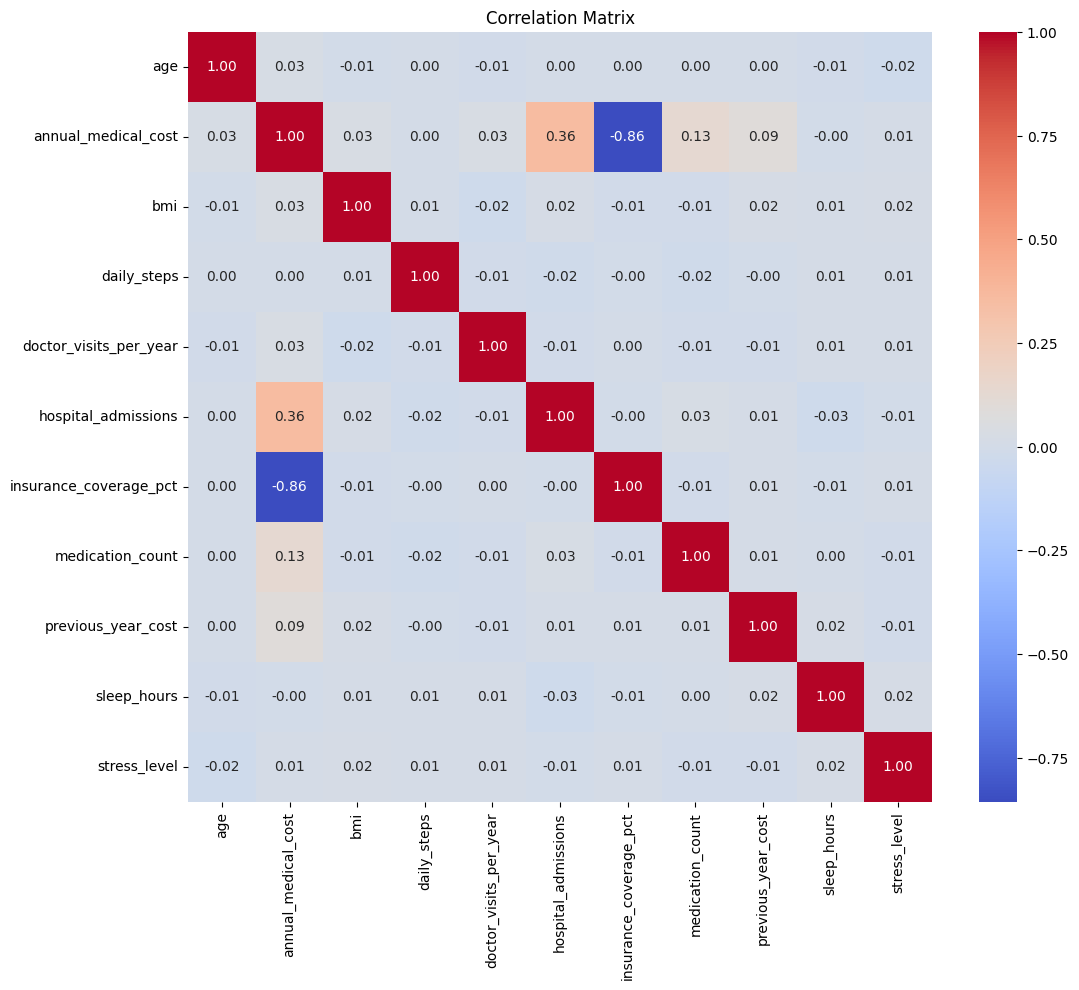

In [76]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## B. Pairplot

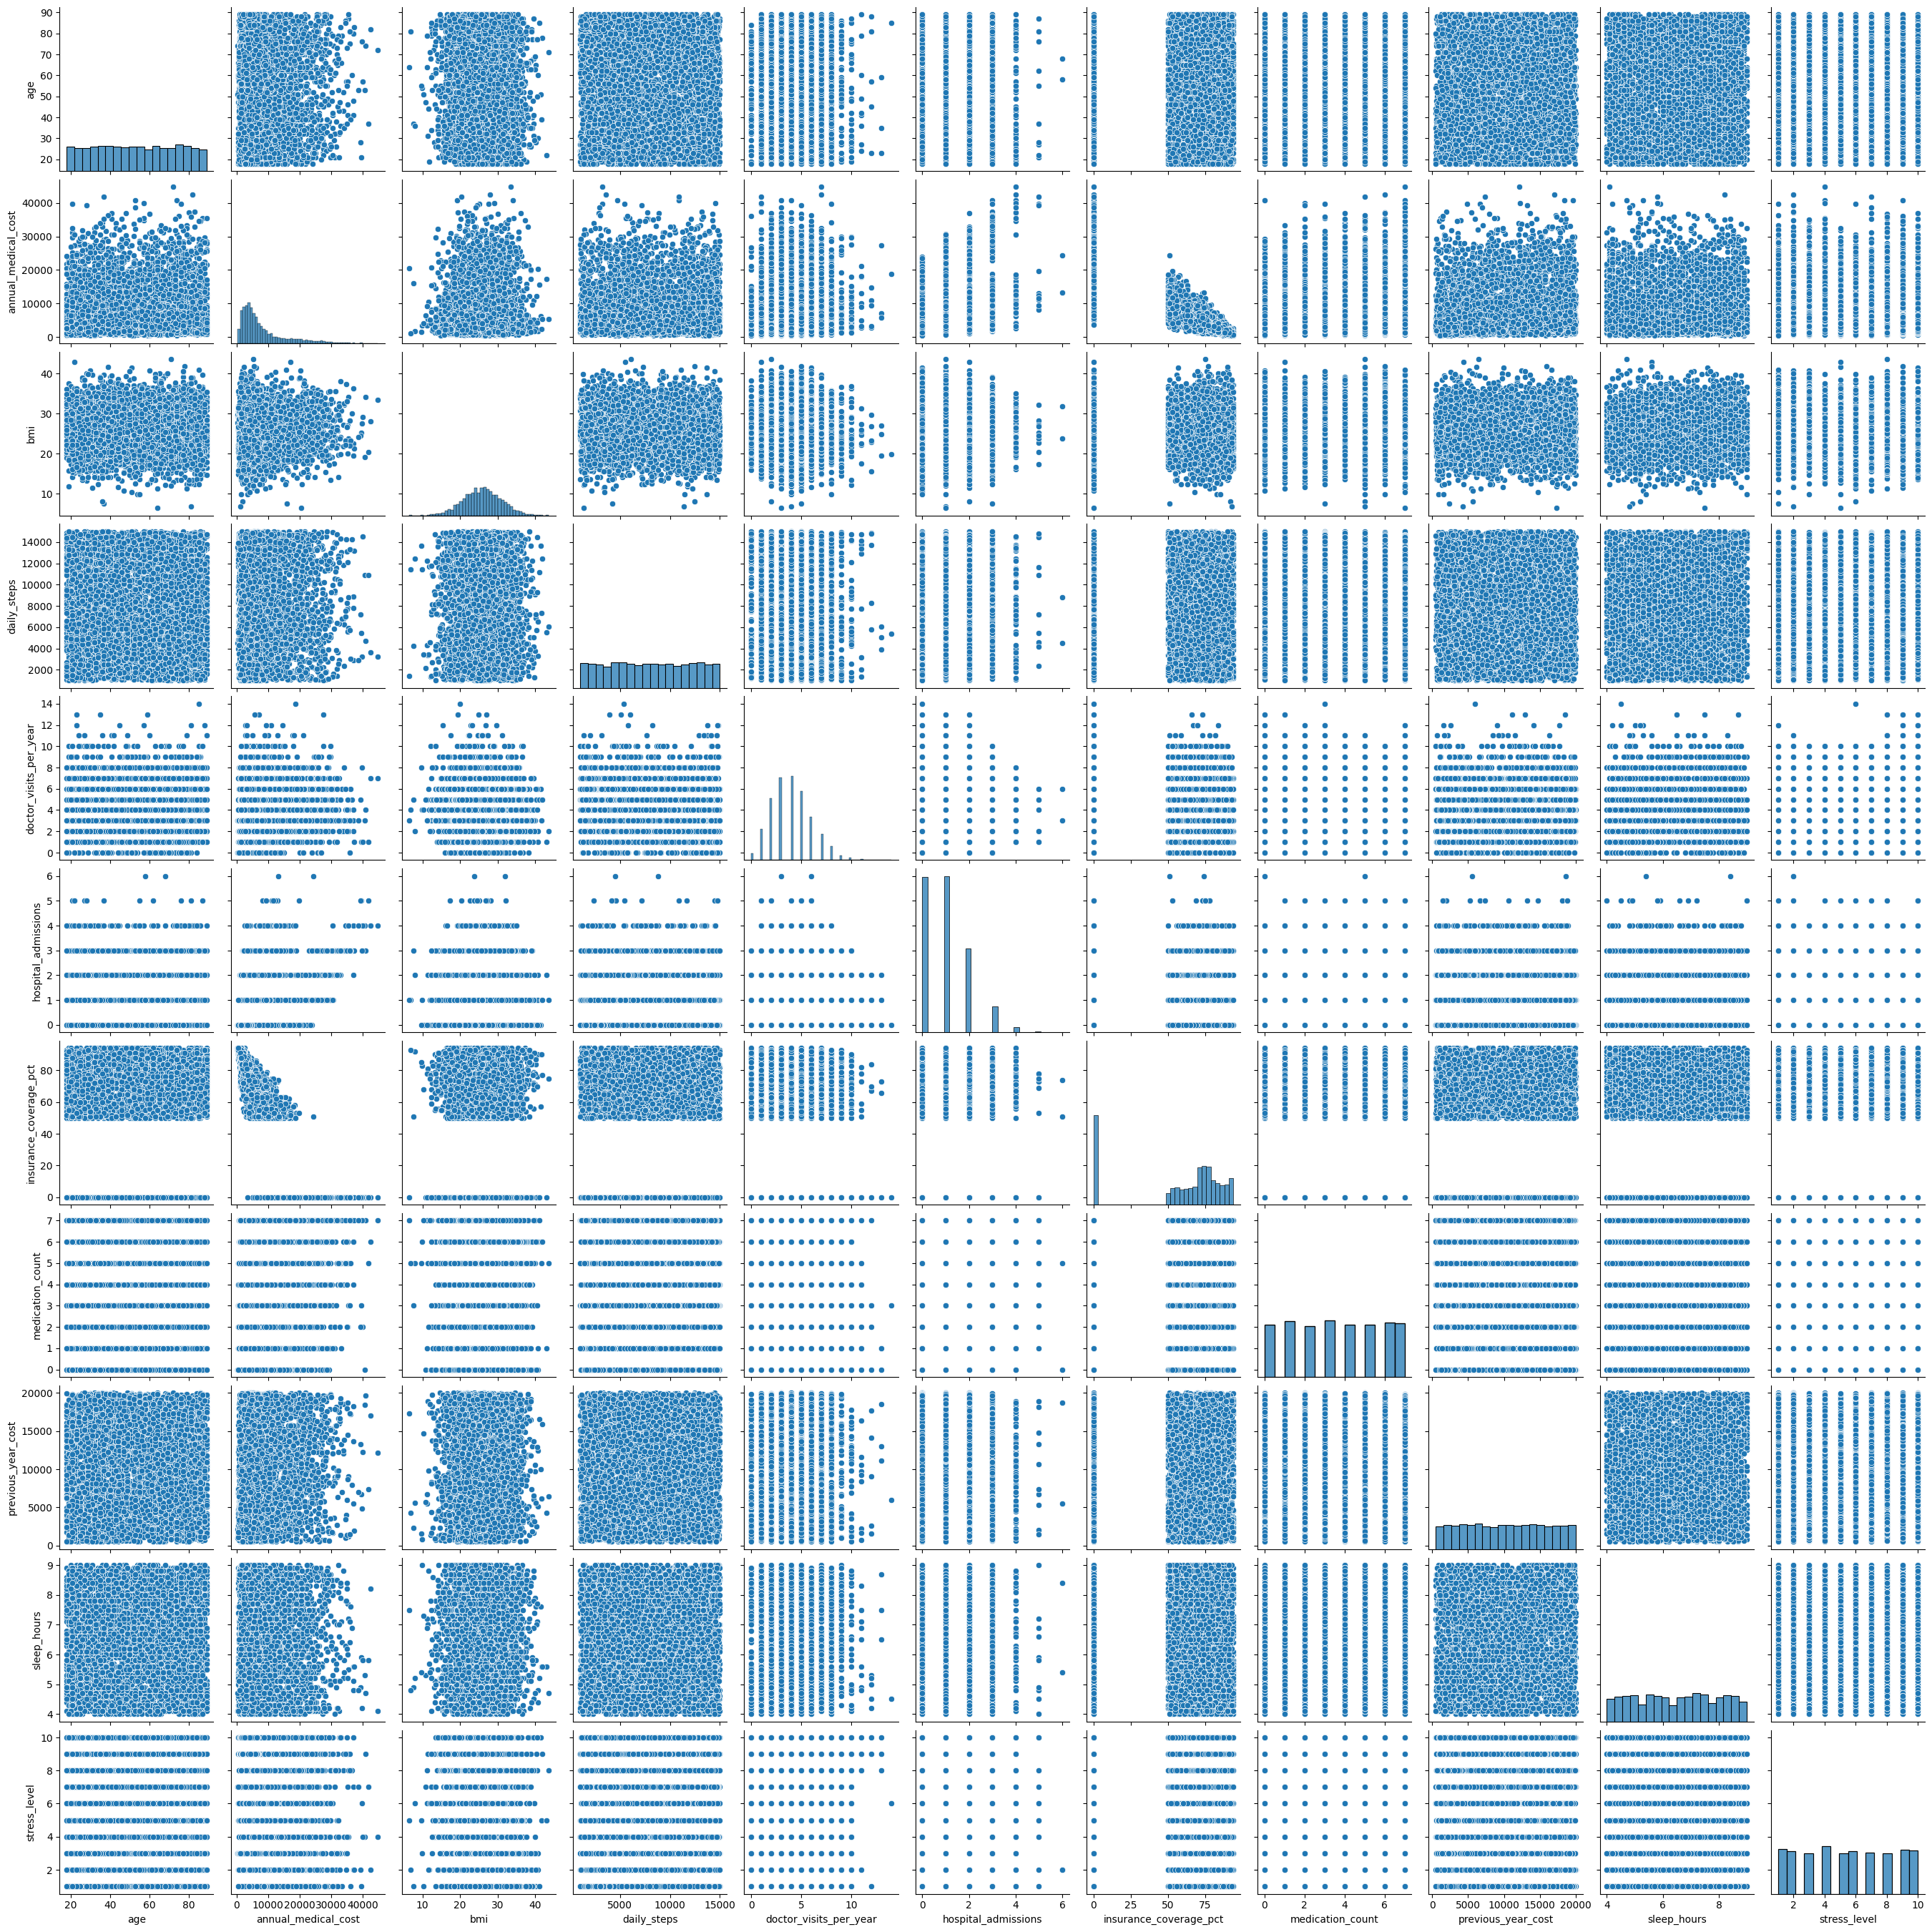

In [77]:
sns.pairplot(df[numeric_cols])
plt.show()

## C. Histogram

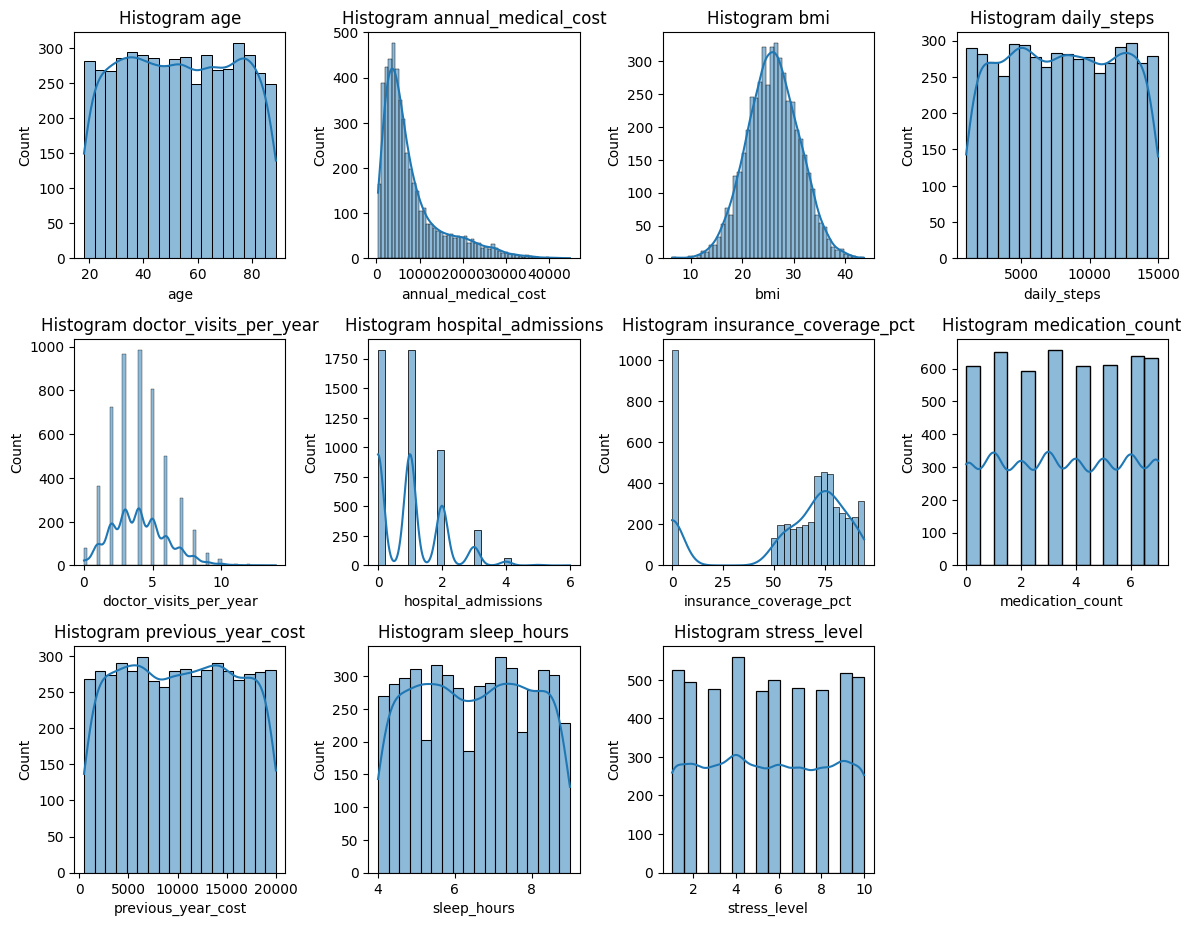

In [78]:
plt.figure(figsize=(12, 12)) 
for i,n in enumerate (numeric_cols,1) :
    plt.subplot(4, 4, i)
    sns.histplot(df[n], kde=True)
    plt.title(f"Histogram {n}")
    plt.tight_layout()
plt.show()

## D. Boxplot

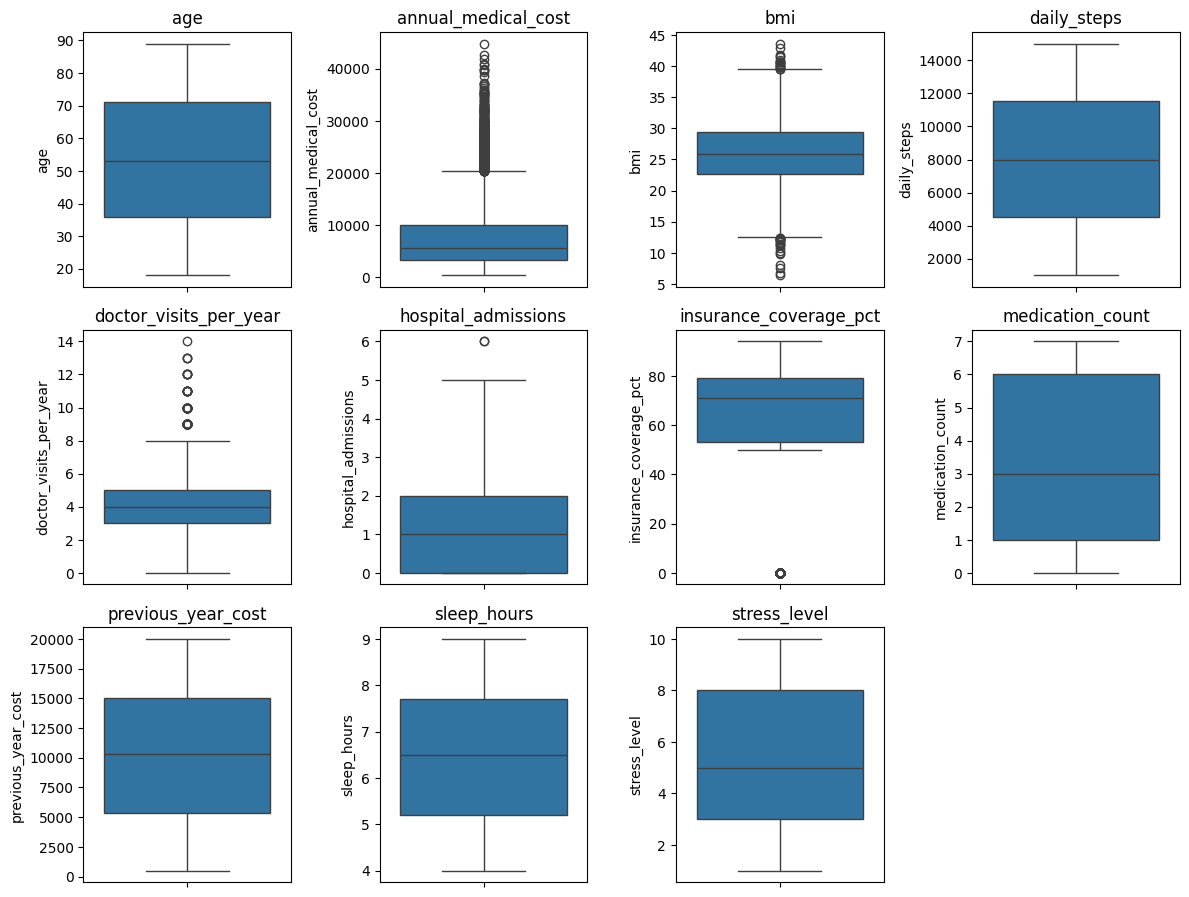

In [79]:
plt.figure(figsize=(12, 12)) 
for i,n in enumerate (numeric_cols,1) :
    plt.subplot(4, 4, i)
    sns.boxplot(df[n])
    plt.title(f"{n}")
    plt.tight_layout()
plt.show()

## E. Pie Chart Kategorik

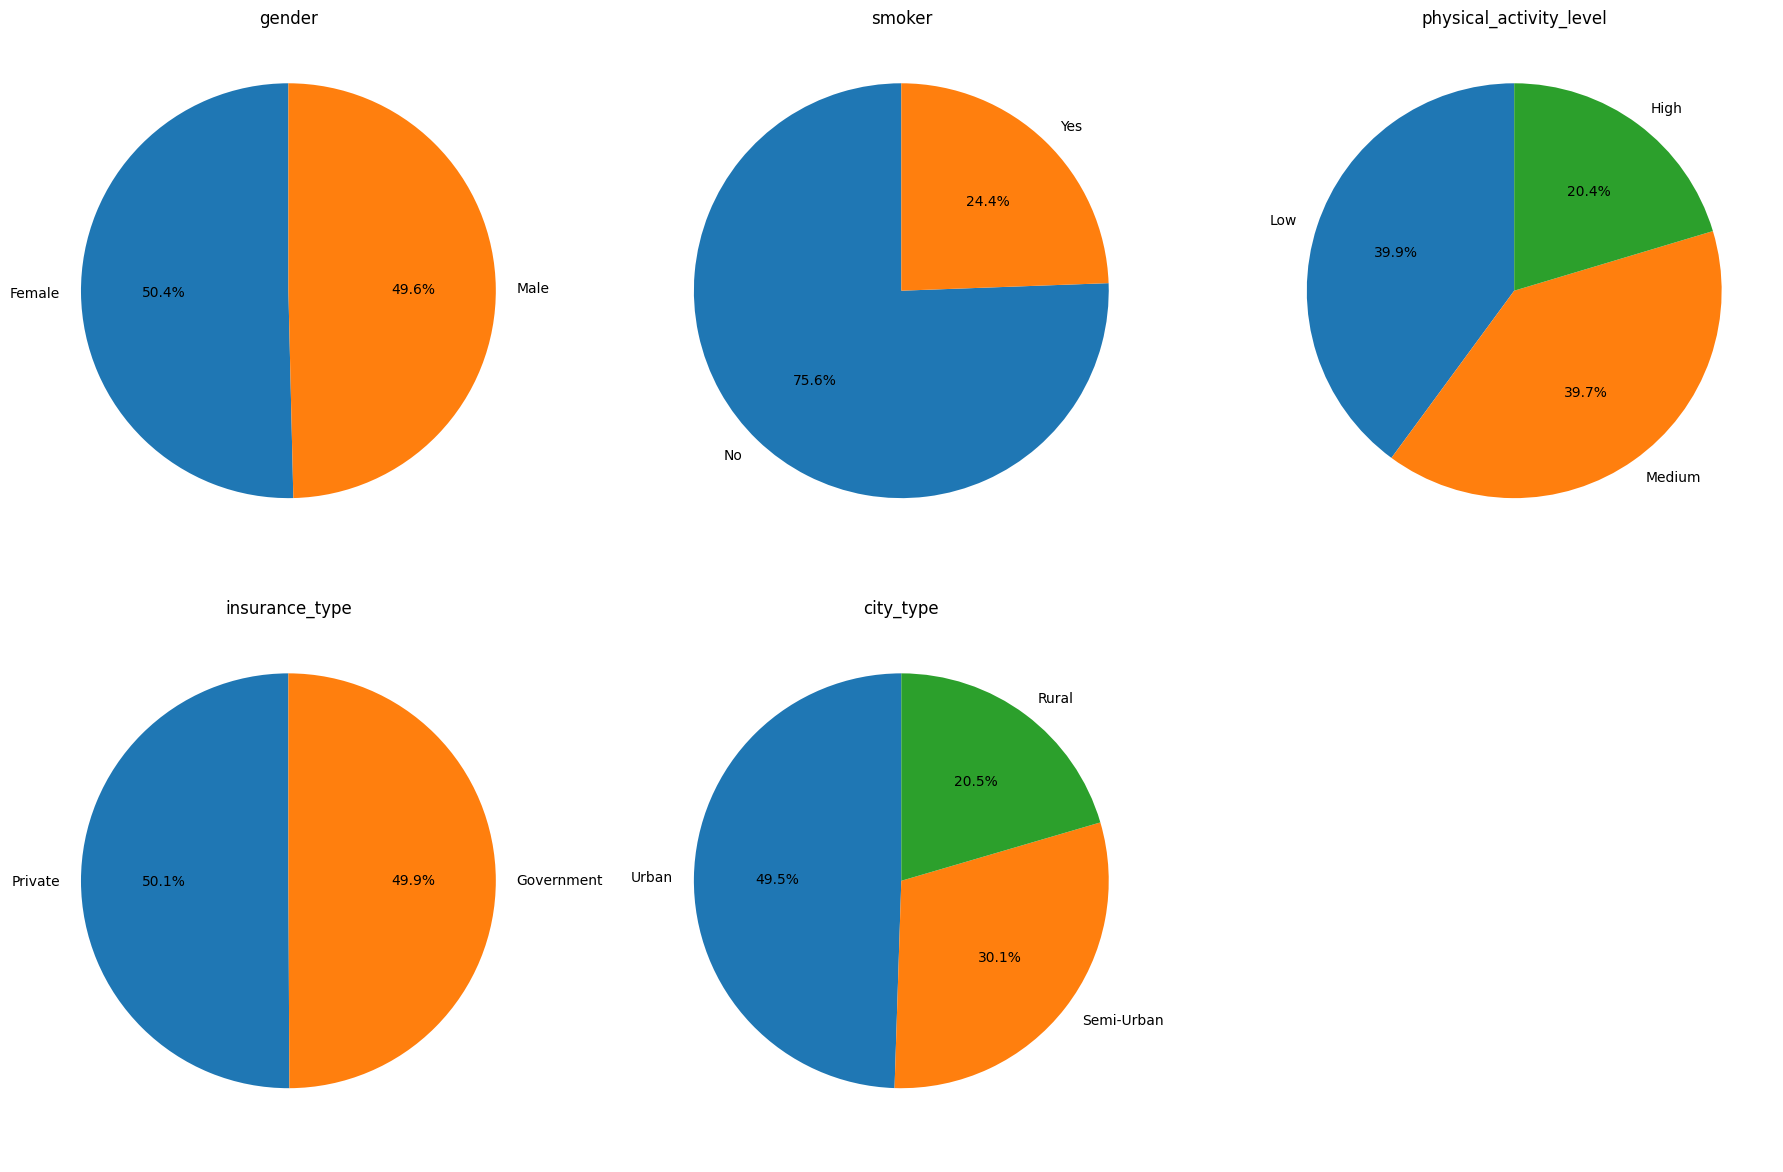

In [80]:
n = len(category_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
axes = axes.flatten()

for ax, col in zip(axes, category_cols):
    counts = df[col].value_counts()
    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(col)

# Hide unused subplots
for ax in axes[len(category_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## F. Pie Chart Boolean

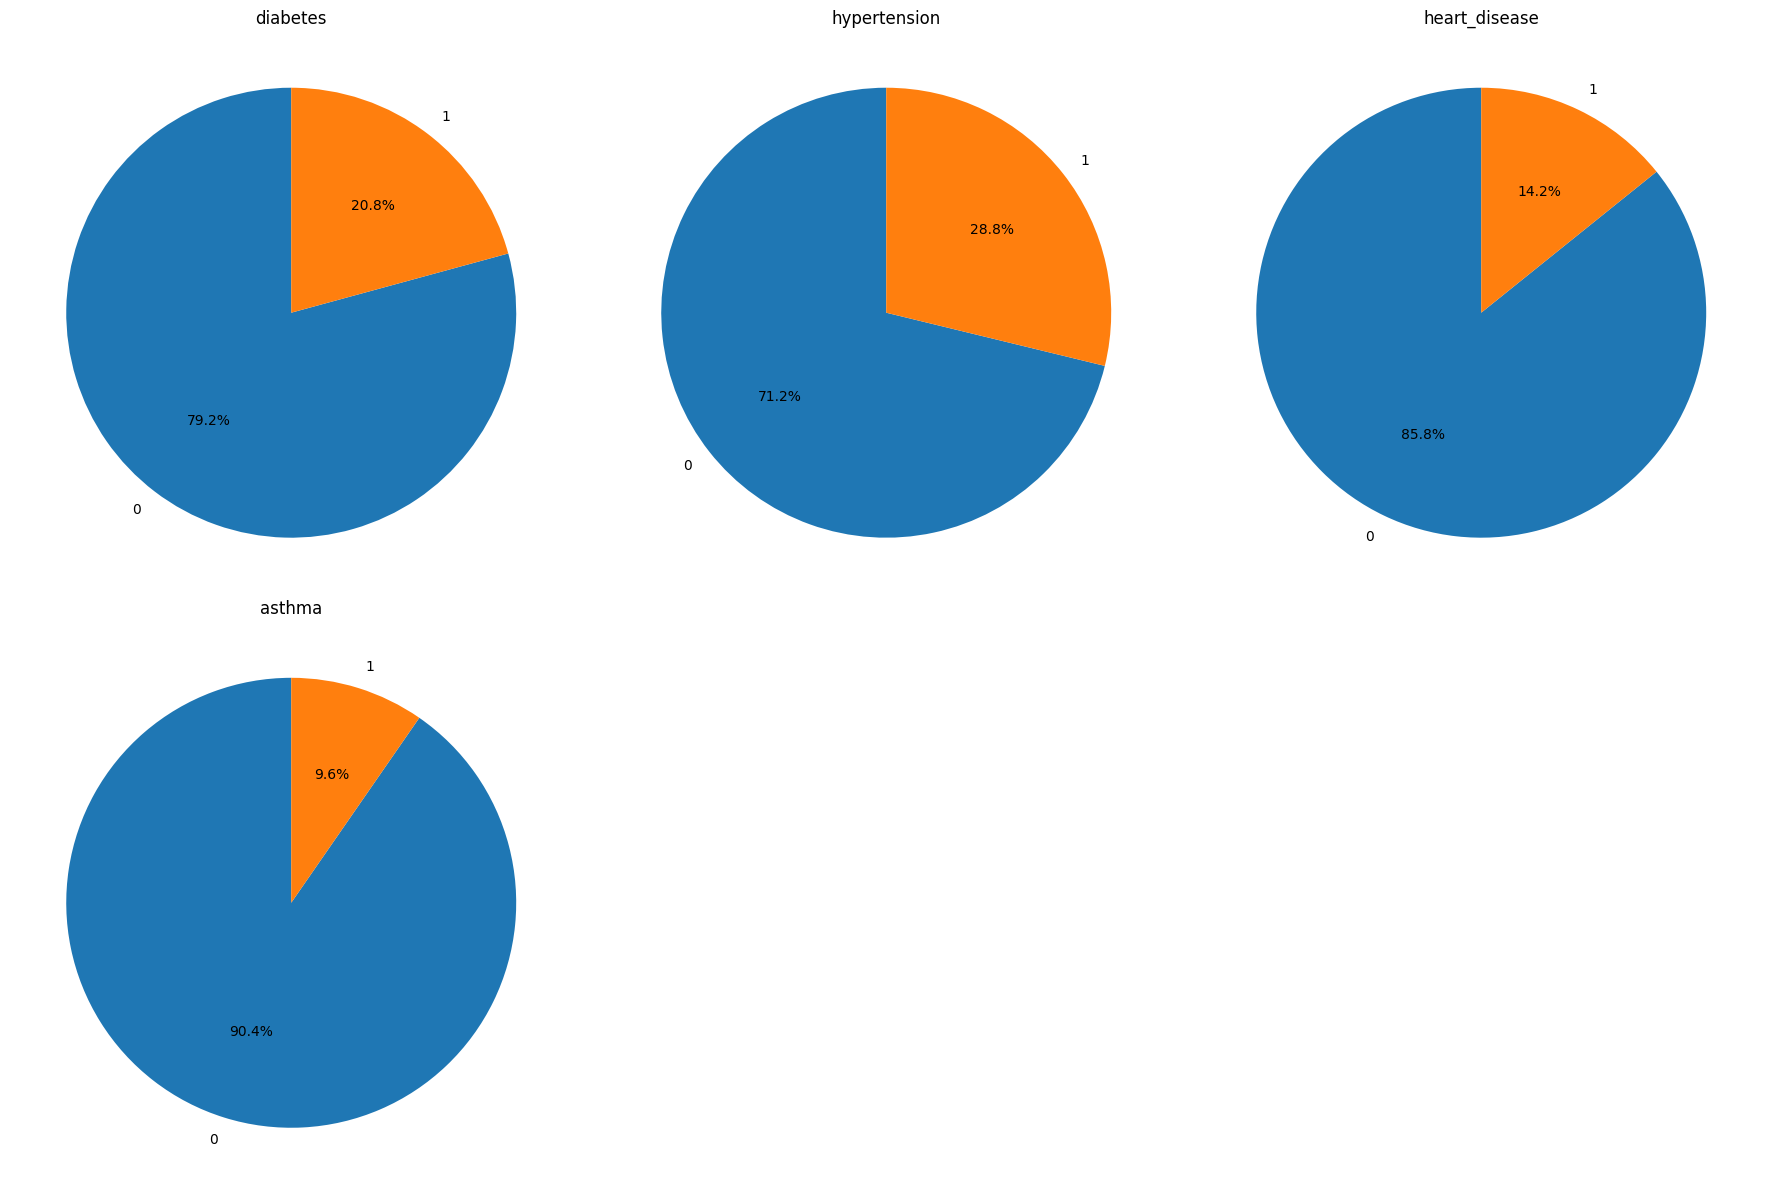

In [81]:
n = len(binary_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
axes = axes.flatten()

for ax, col in zip(axes, binary_cols):
    counts = df[col].value_counts()
    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(col)

# Hide unused subplots
for ax in axes[len(binary_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## A. Missing Value Handling

### Cek Missing Value

In [82]:
df.isnull().sum()

age                           0
gender                        0
bmi                           0
smoker                        0
diabetes                      0
hypertension                  0
heart_disease                 0
asthma                        0
physical_activity_level       0
daily_steps                   0
sleep_hours                   0
stress_level                  0
doctor_visits_per_year        0
hospital_admissions           0
medication_count              0
insurance_type             1048
insurance_coverage_pct        0
city_type                     0
previous_year_cost            0
annual_medical_cost           0
dtype: int64

### Cek Nilai Unik Kolom Insurance Untuk Keputusan Handling

In [83]:
df['insurance_type'].unique()

array(['Private', 'Government', nan], dtype=object)

### Missing Value Handling

In [84]:
df['insurance_type'] = df['insurance_type'].fillna('Unknown')


### Missing Value Setelah Handling

In [85]:
df.isnull().sum()

age                        0
gender                     0
bmi                        0
smoker                     0
diabetes                   0
hypertension               0
heart_disease              0
asthma                     0
physical_activity_level    0
daily_steps                0
sleep_hours                0
stress_level               0
doctor_visits_per_year     0
hospital_admissions        0
medication_count           0
insurance_type             0
insurance_coverage_pct     0
city_type                  0
previous_year_cost         0
annual_medical_cost        0
dtype: int64

## B. Outlier Handling

### Outlier Detection dengan IQR

In [86]:
outlier_counts = {}
for col in df[numeric_cols]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many are outside the range
    count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = count
outlier_counts = pd.DataFrame(data = outlier_counts.items(), columns=['Column', 'Outlier Count'])
display(outlier_counts)

,Column,Outlier Count
0,age,0
1,annual_medical_cost,416
2,bmi,39
3,daily_steps,0
4,doctor_visits_per_year,105
5,hospital_admissions,2
6,insurance_coverage_pct,1048
7,medication_count,0
8,previous_year_cost,0
9,sleep_hours,0


### Mengecek Statistik Data Untuk Keputusan Ourlier Handling

In [87]:
for col in numeric_cols :
    print(col)
    print(
        "mean : ", df[col].mean(),
        "Q1 : ", df[col].quantile(0.25),
        "Q3 : ", df[col].quantile(0.75))
    print("min : ", df[col].min(),
        ", max : ",df[col].max())

age
mean :  53.299 Q1 :  36.0 Q3 :  71.0
min :  18 , max :  89
annual_medical_cost
mean :  8048.886894 Q1 :  3241.9775 Q3 :  10094.0975
min :  404.95 , max :  44792.1
bmi
mean :  25.97082 Q1 :  22.6 Q3 :  29.4
min :  6.4 , max :  43.6
daily_steps
mean :  7993.2168 Q1 :  4545.0 Q3 :  11532.25
min :  1004 , max :  14999
doctor_visits_per_year
mean :  4.0306 Q1 :  3.0 Q3 :  5.0
min :  0 , max :  14
hospital_admissions
mean :  1.001 Q1 :  0.0 Q3 :  2.0
min :  0 , max :  6
insurance_coverage_pct
mean :  57.953 Q1 :  53.0 Q3 :  79.0
min :  0 , max :  94
medication_count
mean :  3.509 Q1 :  1.0 Q3 :  6.0
min :  0 , max :  7
previous_year_cost
mean :  10248.5154 Q1 :  5342.75 Q3 :  15034.5
min :  500 , max :  19996
sleep_hours
mean :  6.48814 Q1 :  5.2 Q3 :  7.7
min :  4.0 , max :  9.0
stress_level
mean :  5.4754 Q1 :  3.0 Q3 :  8.0
min :  1 , max :  10


### Outlier Handling

Berdasarkan data statistik meskipun terdeteksi outlier dengan metode IQR beberapa kolom menunjukan kewajaran jika memiliki nilai ekstrem. Contoh insurance_coverage_pct memiliki nilai 0 artinya pasien tidak menggunakan asuransi tetapi dianggap outlier oleh IQR. Namun, ada beberapa kolom yang memang harus di handling seperti BMI, BMI dibawah 15 tidak relistis dan annual_medical_cost_log. annual_medical_cost_log dihandle dengan log transform dan BMI dengan lower cap

In [88]:
df['annual_medical_cost'] = np.log1p(df['annual_medical_cost'])
df['bmi'] = df['bmi'].clip(lower=15)

### Mengecek Outlier setelah Handling

In [89]:
outlier_counts = {}
for col in df[numeric_cols]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many are outside the range
    count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = count
outlier_counts = pd.DataFrame(data = outlier_counts.items(), columns=['Column', 'Outlier Count'])
display(outlier_counts)

,Column,Outlier Count
0,age,0
1,annual_medical_cost,8
2,bmi,19
3,daily_steps,0
4,doctor_visits_per_year,105
5,hospital_admissions,2
6,insurance_coverage_pct,1048
7,medication_count,0
8,previous_year_cost,0
9,sleep_hours,0


## C. Labelling Kolom Kategori

### Mengecek Kembali Isi Kolom Kategorik Untuk Keputusan Labelling

In [90]:
df[category_cols].head()

,gender,smoker,physical_activity_level,insurance_type,city_type
0,Male,No,Medium,Private,Semi-Urban
1,Female,No,Medium,Government,Semi-Urban
2,Male,No,High,Unknown,Urban
3,Male,Yes,Low,Government,Urban
4,Male,No,High,Private,Urban


### One Hot Encoding Untuk gender dan insurance_type

In [91]:
df = pd.get_dummies(
    df,
    columns=['gender', 'insurance_type'],
    prefix=['gender', 'insurance'],
    drop_first=False
)
onehot_cols = df.select_dtypes(include='bool').columns
df[onehot_cols] = df[onehot_cols].astype(int)
df.head()

,age,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost,gender_Female,gender_Male,insurance_Government,insurance_Private,insurance_Unknown
0,69,29.4,No,1,0,0,0,Medium,14825,4.4,8,1,0,4,80,Semi-Urban,10885,7.880993,0,1,0,1,0
1,32,22.9,No,1,0,0,0,Medium,3620,6.0,7,4,3,0,64,Semi-Urban,18722,9.302071,1,0,1,0,0
2,89,25.7,No,0,0,0,0,High,10578,4.5,7,2,0,3,0,Urban,4196,9.037272,0,1,0,0,1
3,78,31.9,Yes,0,1,0,0,Low,6226,8.6,9,6,1,7,70,Urban,11128,8.986899,0,1,1,0,0
4,38,27.7,No,0,0,0,0,High,6253,5.7,3,6,0,6,77,Urban,15110,8.072005,0,1,0,1,0


### Binary Labelling Untuk Smoker

In [92]:
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df.head()

,age,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost,gender_Female,gender_Male,insurance_Government,insurance_Private,insurance_Unknown
0,69,29.4,0,1,0,0,0,Medium,14825,4.4,8,1,0,4,80,Semi-Urban,10885,7.880993,0,1,0,1,0
1,32,22.9,0,1,0,0,0,Medium,3620,6.0,7,4,3,0,64,Semi-Urban,18722,9.302071,1,0,1,0,0
2,89,25.7,0,0,0,0,0,High,10578,4.5,7,2,0,3,0,Urban,4196,9.037272,0,1,0,0,1
3,78,31.9,1,0,1,0,0,Low,6226,8.6,9,6,1,7,70,Urban,11128,8.986899,0,1,1,0,0
4,38,27.7,0,0,0,0,0,High,6253,5.7,3,6,0,6,77,Urban,15110,8.072005,0,1,0,1,0


### Ordinal Labelling Untuk physical_activity_level dan city_type

In [93]:
df['physical_activity_level'] = df['physical_activity_level'].map({
    'Low': 1, 'Medium': 2, 'High': 3
})

df['city_type'] = df['city_type'].map({
    'Rural': 1, 'Semi-Urban': 2, 'Urban': 3
})
df.head()

,age,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost,gender_Female,gender_Male,insurance_Government,insurance_Private,insurance_Unknown
0,69,29.4,0,1,0,0,0,2,14825,4.4,8,1,0,4,80,2,10885,7.880993,0,1,0,1,0
1,32,22.9,0,1,0,0,0,2,3620,6.0,7,4,3,0,64,2,18722,9.302071,1,0,1,0,0
2,89,25.7,0,0,0,0,0,3,10578,4.5,7,2,0,3,0,3,4196,9.037272,0,1,0,0,1
3,78,31.9,1,0,1,0,0,1,6226,8.6,9,6,1,7,70,3,11128,8.986899,0,1,1,0,0
4,38,27.7,0,0,0,0,0,3,6253,5.7,3,6,0,6,77,3,15110,8.072005,0,1,0,1,0


### Drop Salah Satu Kolom One Hot

In [94]:
df = df.drop(columns = ['gender_Male','insurance_Unknown'],axis = 1)

In [95]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head()

,age,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost,gender_Female,insurance_Government,insurance_Private
0,69,29.4,0,1,0,0,0,2,14825,4.4,8,1,0,4,80,2,10885,7.880993,0,0,1
1,32,22.9,0,1,0,0,0,2,3620,6.0,7,4,3,0,64,2,18722,9.302071,1,1,0
2,89,25.7,0,0,0,0,0,3,10578,4.5,7,2,0,3,0,3,4196,9.037272,0,0,0
3,78,31.9,1,0,1,0,0,1,6226,8.6,9,6,1,7,70,3,11128,8.986899,0,1,0
4,38,27.7,0,0,0,0,0,3,6253,5.7,3,6,0,6,77,3,15110,8.072005,0,0,1


## D. Standarisasi

### Menstandarisasi Kolom yang Tidak Bernilai 0/1

In [96]:
binary_cols2 = [col for col in numeric_cols if set(df[col].dropna().unique()).issubset({0, 1})]
cols_to_standardize = [col for col in numeric_cols if col not in binary_cols2]
display(cols_to_standardize)

['age',
 'annual_medical_cost',
 'bmi',
 'daily_steps',
 'doctor_visits_per_year',
 'hospital_admissions',
 'insurance_coverage_pct',
 'medication_count',
 'previous_year_cost',
 'sleep_hours',
 'stress_level']

In [97]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])
df_scaled = pd.DataFrame(df_scaled,columns = df.columns)
df_scaled.head()

,age,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost,gender_Female,insurance_Government,insurance_Private
0,0.760531,0.683724,0,1,0,0,0,2,1.686143,-1.446866,0.872953,-1.507395,-1.023028,0.214177,0.697148,2,0.113142,-0.911794,0,0,1
1,-1.031689,-0.622819,0,1,0,0,0,2,-1.079348,-0.338231,0.527174,-0.015220,2.042990,-1.530649,0.191212,2,1.506255,0.772877,1,1,0
2,1.729299,-0.060001,0,0,0,0,0,3,0.637947,-1.377576,0.527174,-1.010003,-1.023028,-0.222029,-1.832530,3,-1.075901,0.458960,0,0,0
3,1.196476,1.186241,1,0,1,0,0,1,-0.436164,1.463301,1.218732,0.979563,-0.001022,1.522797,0.380938,3,0.156338,0.399244,0,1,0
4,-0.741059,0.342013,0,0,0,0,0,3,-0.429501,-0.546100,-0.855941,0.979563,-1.023028,1.086591,0.602285,3,0.864182,-0.685351,0,0,1


## E. Export Preprocessed Data

In [98]:
df_scaled.to_csv("medical_cost_preprocessed.csv", index=False)